<a href="https://colab.research.google.com/github/pasindu-94/solar-power-prediction/blob/master/solar_power_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solar Power Prediction and Forecasting Analysis

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data Sets

In [48]:
solar_generation_data_file = 'https://raw.githubusercontent.com/pasindu-94/solar-power-prediction/master/datasets/solar_power_generation_data.csv'
weather_data_file = 'https://raw.githubusercontent.com/pasindu-94/solar-power-prediction/master/datasets/weather_sensor_data.csv'

# Load CSV File
solar_data = pd.read_csv(solar_generation_data_file)
weather_data = pd.read_csv(weather_data_file)


In [49]:
solar_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,5/15/2020 0:00,4136001,iq8k7ZNt4Mwm3w0,0.0,0.0,3075.333333,2.247720e+09
1,5/15/2020 0:15,4136001,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,2.247720e+09
2,5/15/2020 0:30,4136001,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,2.247720e+09
3,5/15/2020 0:45,4136001,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,2.247720e+09
4,5/15/2020 1:00,4136001,iq8k7ZNt4Mwm3w0,0.0,0.0,0.000000,2.247720e+09


In [50]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,5/15/2020 0:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,5/15/2020 0:15,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,5/15/2020 0:30,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,5/15/2020 0:45,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,5/15/2020 1:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


##Data Set Preprocessing for Analysis

###Solar Generation Data

In [51]:
solar_data.shape

(3259, 7)

In [52]:
solar_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE_TIME,3259,3259,5/25/2020 3:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLANT_ID,3259,NaN,NaN,NaN,4.136e+06,0,4.136e+06,4.136e+06,4.136e+06,4.136e+06,4.136e+06
SOURCE_KEY,3259,1,iq8k7ZNt4Mwm3w0,3259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,3259,NaN,NaN,NaN,244.653,369.796,0,0,0,449.169,1396.59
AC_POWER,3259,NaN,NaN,NaN,239.282,361.384,0,0,0,440.861,1361.67
DAILY_YIELD,3259,NaN,NaN,NaN,2793.97,2885.14,0,0,2002.47,4543,9246
TOTAL_YIELD,3259,NaN,NaN,NaN,2.21514e+09,2.43027e+08,0,2.24777e+09,2.24784e+09,2.24787e+09,2.24792e+09


####Drop Unnecessary Columns

*   Dropping **SOURCE_KEY** since its common for all rows
*   Dropping **PLANT_ID** since its common for all rows
*   Dropping **TOTAL_YIELD** since the prediction is based on time and the day both






In [53]:
solar_data.drop(labels='SOURCE_KEY', axis=1, inplace=True)
solar_data.drop(labels='PLANT_ID', axis=1, inplace=True)
solar_data.drop(labels='TOTAL_YIELD', axis=1, inplace=True)

solar_data.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
0,5/15/2020 0:00,0.0,0.0,3075.333333
1,5/15/2020 0:15,0.0,0.0,0.000000
2,5/15/2020 0:30,0.0,0.0,0.000000
3,5/15/2020 0:45,0.0,0.0,0.000000
4,5/15/2020 1:00,0.0,0.0,0.000000


####Missing Value Check

In [54]:
solar_data.isnull().sum()

DATE_TIME      0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
dtype: int64

####Formating Date & Time

In [55]:
solar_data['DATE_TIME'] = pd.to_datetime(solar_data['DATE_TIME'])
solar_data.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD
0,2020-05-15 00:00:00,0.0,0.0,3075.333333
1,2020-05-15 00:15:00,0.0,0.0,0.000000
2,2020-05-15 00:30:00,0.0,0.0,0.000000
3,2020-05-15 00:45:00,0.0,0.0,0.000000
4,2020-05-15 01:00:00,0.0,0.0,0.000000


In [56]:
solar_data['DATE'] = solar_data['DATE_TIME'].apply(lambda x:x.date())
solar_data['TIME'] = solar_data['DATE_TIME'].apply(lambda x:x.time())

In [57]:
solar_data.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,DATE,TIME
0,2020-05-15 00:00:00,0.0,0.0,3075.333333,2020-05-15,00:00:00
1,2020-05-15 00:15:00,0.0,0.0,0.000000,2020-05-15,00:15:00
2,2020-05-15 00:30:00,0.0,0.0,0.000000,2020-05-15,00:30:00
3,2020-05-15 00:45:00,0.0,0.0,0.000000,2020-05-15,00:45:00
4,2020-05-15 01:00:00,0.0,0.0,0.000000,2020-05-15,01:00:00


###Weather Data

In [58]:
weather_data.shape

(3259, 6)

In [59]:
weather_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DATE_TIME,3259,3259,5/25/2020 3:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PLANT_ID,3259,NaN,NaN,NaN,4.136e+06,0,4.136e+06,4.136e+06,4.136e+06,4.136e+06,4.136e+06
SOURCE_KEY,3259,1,iq8k7ZNt4Mwm3w0,3259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMBIENT_TEMPERATURE,3259,NaN,NaN,NaN,28.0694,4.06156,20.9424,24.6021,26.9813,31.0568,39.1816
MODULE_TEMPERATURE,3259,NaN,NaN,NaN,32.7724,11.344,20.2651,23.7169,27.5346,40.4807,66.636
IRRADIATION,3259,NaN,NaN,NaN,0.232737,0.312693,0,0,0.0190405,0.438717,1.09877


####Drop Unnecessary Columns

*   Dropping **SOURCE_KEY** since its common for all rows
*   Dropping **PLANT_ID** since its common for all rows







In [60]:
weather_data.drop(labels='SOURCE_KEY', axis=1, inplace=True)
weather_data.drop(labels='PLANT_ID', axis=1, inplace=True)

weather_data.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,5/15/2020 0:00,27.004764,25.060789,0.0
1,5/15/2020 0:15,26.880811,24.421869,0.0
2,5/15/2020 0:30,26.682055,24.427290,0.0
3,5/15/2020 0:45,26.500589,24.420678,0.0
4,5/15/2020 1:00,26.596148,25.088210,0.0


####Missing Value Check

In [61]:
weather_data.isnull().sum()

DATE_TIME              0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

####Formating Date & Time

In [62]:
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])
weather_data.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,26.596148,25.088210,0.0


###Merge Solar & Weather Data based on the DATE_TIME

In [63]:
main_df = pd.merge(solar_data, weather_data, how='inner', on='DATE_TIME')

In [64]:
main_df.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,3075.333333,2020-05-15,00:00:00,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.000000,2020-05-15,00:15:00,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.000000,2020-05-15,00:30:00,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.000000,2020-05-15,00:45:00,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.000000,2020-05-15,01:00:00,26.596148,25.088210,0.0


### Creating Unique ID and Rearranging Columns

In [65]:
main_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258],
           dtype='int64', length=3259)

In [66]:
main_df['ID'] = main_df.index+1
main_df.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,DATE,TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,ID
0,2020-05-15 00:00:00,0.0,0.0,3075.333333,2020-05-15,00:00:00,27.004764,25.060789,0.0,1
1,2020-05-15 00:15:00,0.0,0.0,0.000000,2020-05-15,00:15:00,26.880811,24.421869,0.0,2
2,2020-05-15 00:30:00,0.0,0.0,0.000000,2020-05-15,00:30:00,26.682055,24.427290,0.0,3
3,2020-05-15 00:45:00,0.0,0.0,0.000000,2020-05-15,00:45:00,26.500589,24.420678,0.0,4
4,2020-05-15 01:00:00,0.0,0.0,0.000000,2020-05-15,01:00:00,26.596148,25.088210,0.0,5


In [67]:
main_df.drop(labels='DATE_TIME', axis=1, inplace=True)

In [68]:
main_df.columns

Index(['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'DATE', 'TIME',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'ID'],
      dtype='object')

In [69]:
main_df = main_df[['ID', 'DATE', 'TIME','DC_POWER', 'AC_POWER', 'DAILY_YIELD','AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]

In [70]:
main_df.head()

,ID,DATE,TIME,DC_POWER,AC_POWER,DAILY_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,1,2020-05-15,00:00:00,0.0,0.0,3075.333333,27.004764,25.060789,0.0
1,2,2020-05-15,00:15:00,0.0,0.0,0.000000,26.880811,24.421869,0.0
2,3,2020-05-15,00:30:00,0.0,0.0,0.000000,26.682055,24.427290,0.0
3,4,2020-05-15,00:45:00,0.0,0.0,0.000000,26.500589,24.420678,0.0
4,5,2020-05-15,01:00:00,0.0,0.0,0.000000,26.596148,25.088210,0.0


#Graphical Analysis

## Graphical Analysis of Power Generation agaist Weather Data

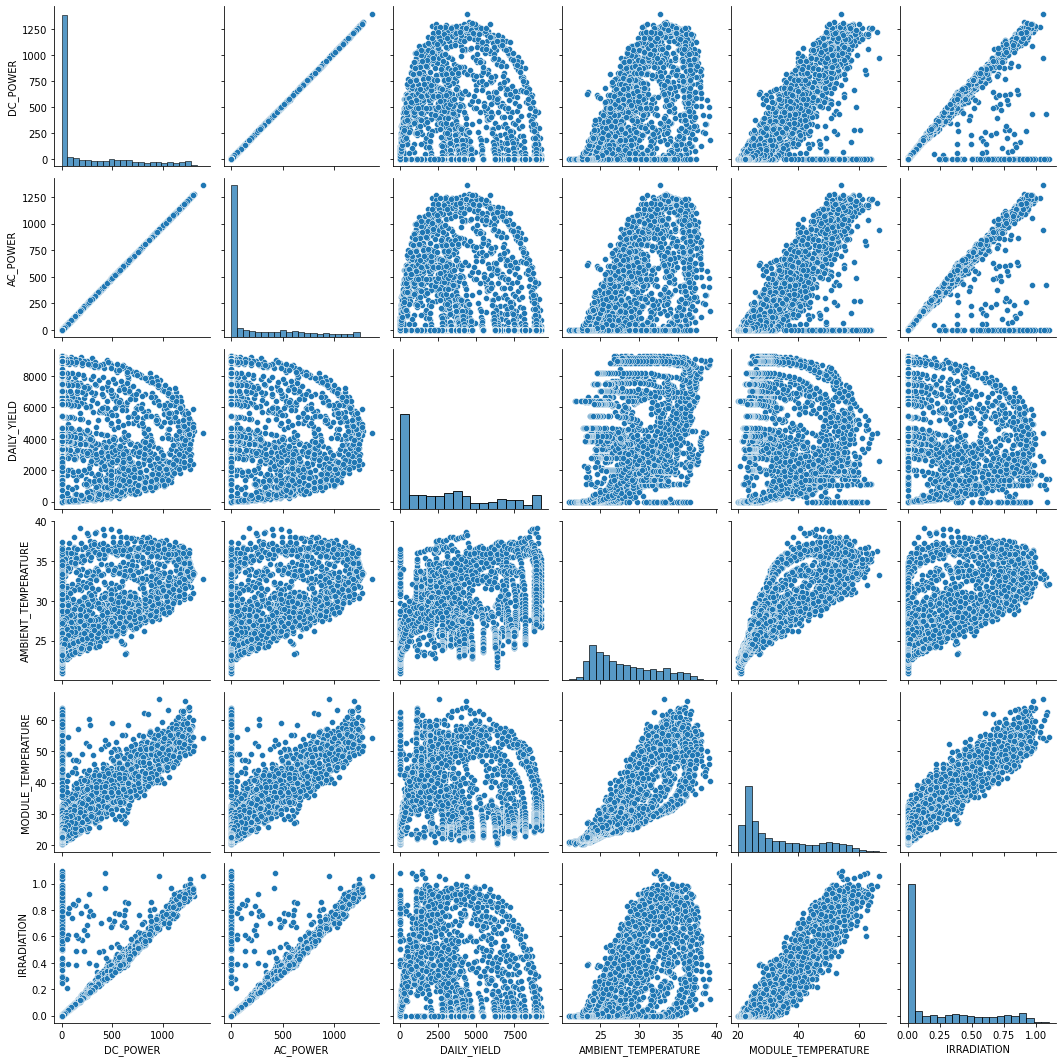

In [72]:
sns.pairplot(main_df[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']])

### Insights from the Graphical Analysis

* DC_POWER and AC_POWER are perfactly linearly related.
* DC_Power and AC_Power generated has a direct relationship with Irradiation.
* Generally Module temperature increases with the increase in Ambient temperature and Irradiation.


## Graphical Analysis of Power Generation agaist Time

Text(0, 0.5, 'DC POWER')

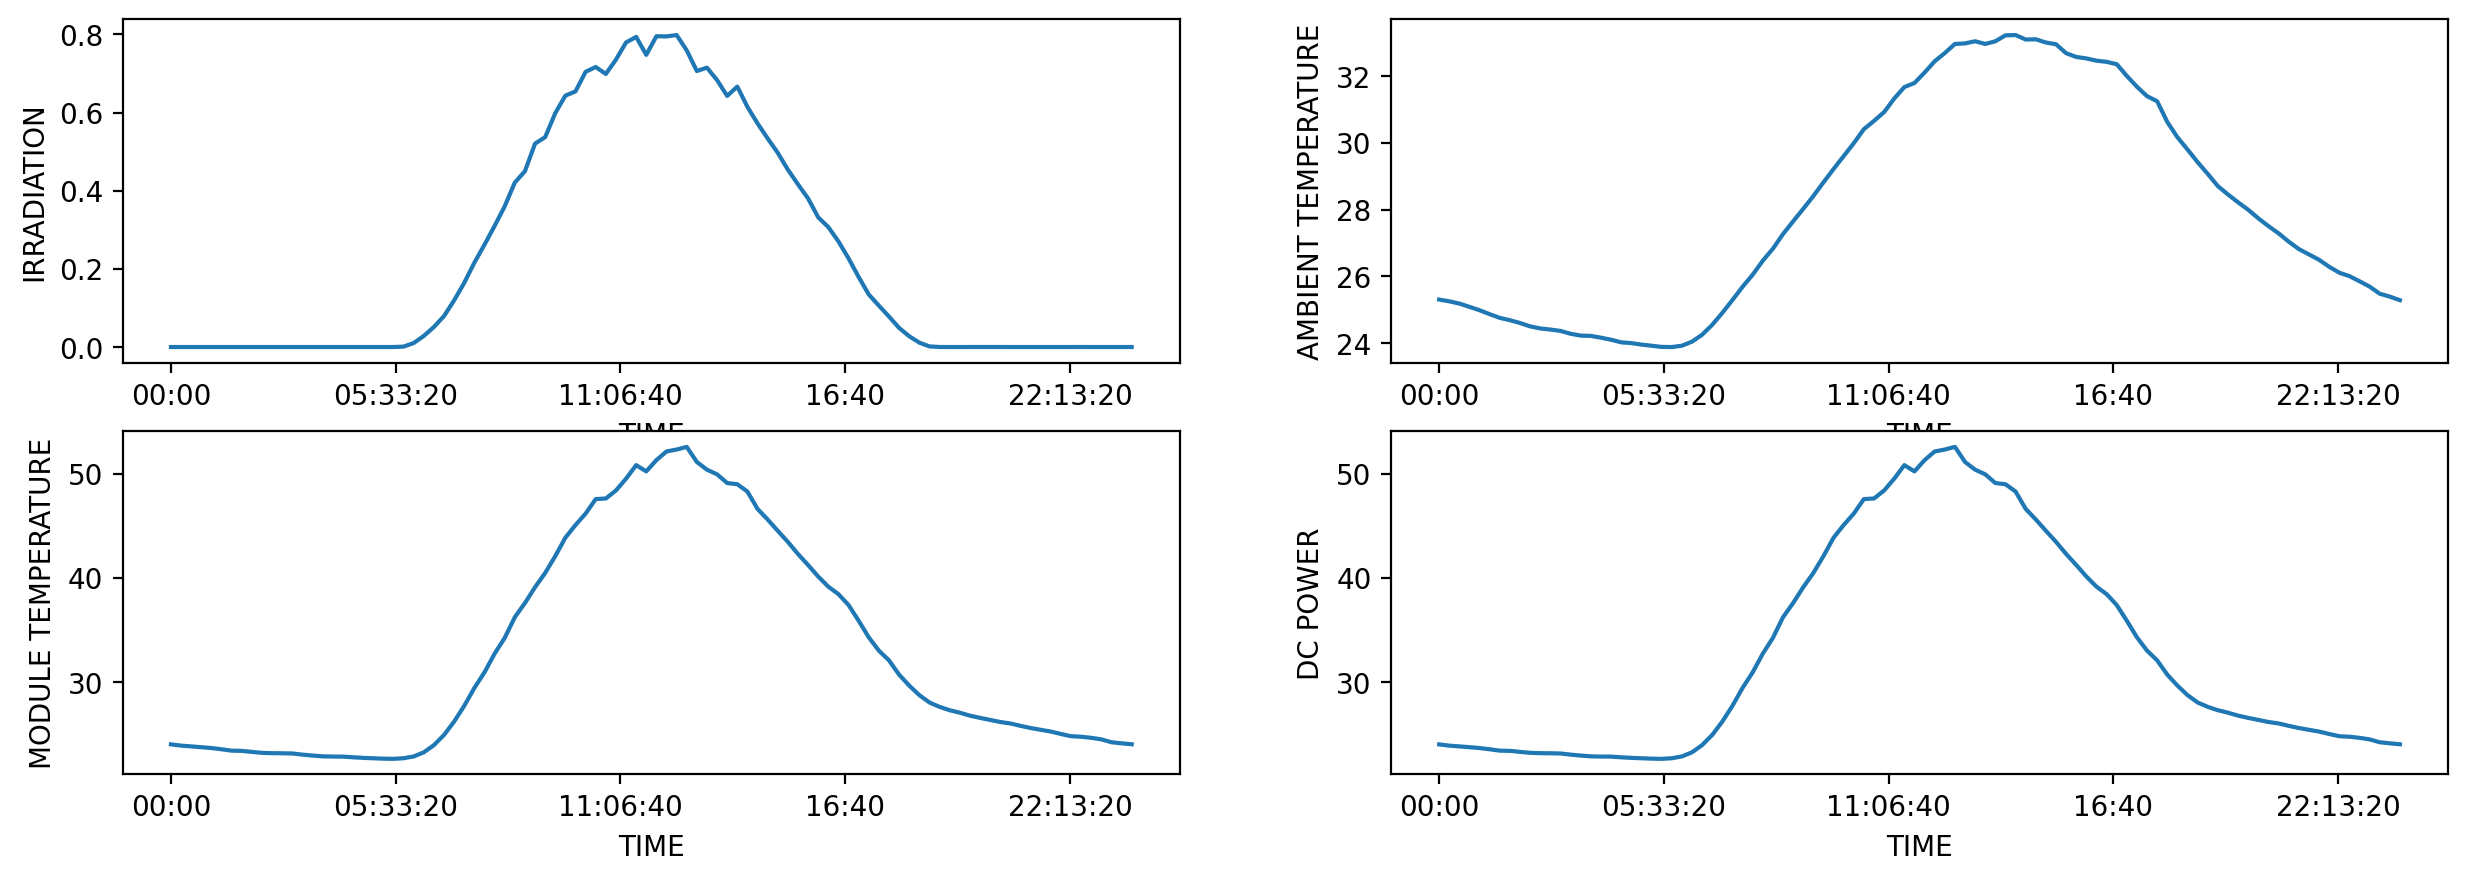

In [75]:
main_df_t =main_df.groupby(['TIME']).mean()

f,ax = plt.subplots(ncols=2,nrows=2,dpi=200,figsize=(15,5))

main_df_t['IRRADIATION'].plot(ax=ax[0,0])
main_df_t['AMBIENT_TEMPERATURE'].plot(ax=ax[0,1])
main_df_t['MODULE_TEMPERATURE'].plot(ax=ax[1,0])
main_df_t['MODULE_TEMPERATURE'].plot(ax=ax[1,1])

ax[0,0].set_ylabel('IRRADIATION')
ax[0,1].set_ylabel('AMBIENT TEMPERATURE')
ax[1,0].set_ylabel('MODULE TEMPERATURE')
ax[1,1].set_ylabel('DC POWER')

### Insights from the Graphical Analysis

* average Irradiation, Ambient Temperature, Module Temperature and DC Power first increases and then decreases from sunrise to sunset.



## Correlation Identification from Graphical Analysis

*   DC_Power & AC_Power are directly correlated
*   DC_Power is postively correlated with Irradation, Module Temperature & Ambient Temperature.




### Correlation Matrix

In [76]:
correlation_matrix = main_df[['DC_POWER','AC_POWER','DAILY_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']].corr()

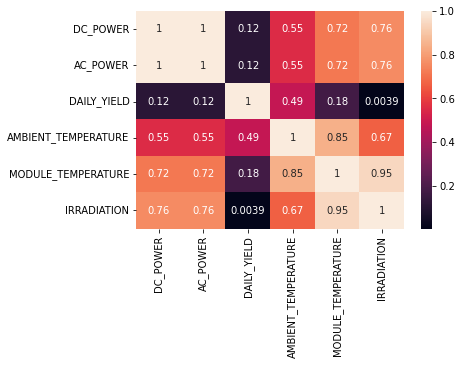

In [79]:
sns.heatmap(correlation_matrix, annot=True)